In [5]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import plotly.express as px

In [6]:
BTC_df = fdr.DataReader('BTC/USD', '2022')
BTC_df = BTC_df.rename(columns = {'Close' : 'BTC_Price'})
BTC = BTC_df.loc[:,['BTC_Price']] # 비트코인

In [7]:
BTC_df

,BTC_Price,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-01,47755.0,46218.0,47954.0,46215.0,2180.0,0.0333
2022-01-02,47314.0,47755.0,47980.0,46698.0,1840.0,-0.0092
2022-01-03,46445.0,47314.0,47578.0,45701.0,2580.0,-0.0184
2022-01-04,45830.0,46445.0,47546.0,45583.0,3790.0,-0.0132
2022-01-05,43418.0,45830.0,47056.7,42519.0,6930.0,-0.0526
...,...,...,...,...,...,...
2022-10-02,19066.0,19317.0,19396.0,18945.0,3160.0,-0.0130
2022-10-03,19638.0,19066.0,19688.0,18985.0,10890.0,0.0300
2022-10-04,20340.0,19638.0,20470.0,19510.0,8470.0,0.0357


In [8]:
NDX_df = fdr.DataReader('NDX', '2022')
NDX_df = NDX_df.rename(columns = {'Close' : 'NDX_Price'})
NDX = NDX_df.loc[:,['NDX_Price']] # 나스닥
NDX_index = NDX.index


In [9]:
NDX_BTC= pd.merge(NDX, BTC, how='left', on='Date')
NDX_BTC

,NDX_Price,BTC_Price
Date,,
2022-01-03,16501.77,46445.0
2022-01-04,16279.73,45830.0
2022-01-05,15771.77,43418.0
2022-01-06,15765.36,43111.0
2022-01-07,15592.19,41518.0
...,...,...
2022-09-29,11164.78,19588.0
2022-09-30,10971.22,19430.0
2022-10-03,11229.73,19638.0


<AxesSubplot:xlabel='Date'>

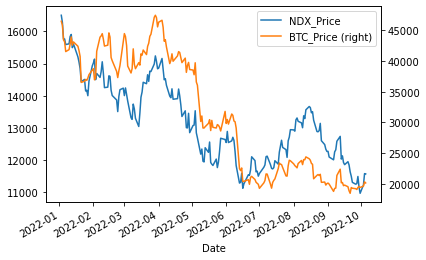

In [10]:
NDX_BTC_Corr = NDX_BTC[['NDX_Price','BTC_Price']].plot(secondary_y='BTC_Price') #맷플롯립
NDX_BTC_Corr

In [12]:
import plotly.graph_objects as go #플롯리
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=NDX.index, y=NDX['NDX_Price'], name="NDX"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=BTC.index, y=BTC['BTC_Price'], name="BTC"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="BTC - Nasdaq Correlation(비트코인과 나스닥은 비슷하게 움직인다.📊)"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>NDX</b> Price", secondary_y=False)
fig.update_yaxes(title_text="<b>BTC</b> Price", secondary_y=True)

fig.show() #🚀